# <center> PANDAS : 
# <center> Эволюционный пинок - Часть 2
   

### <center> Панды
Больша́я па́нда, или бамбу́ковый медве́дь (лат. Ailuropoda melanoleuca) — вид всеядных млекопитающих из семейства медвежьих со своеобразной чёрно-белой окраской шерсти, обладающих некоторыми признаками енотов. Единственный современный вид рода Ailuropus подсемейства Ailuropodinae. Большие панды обитают в горных регионах центрального Китая: Сычуань и Тибет.
<center> <img src= "imgs/external-content.duckduckgo.com.jpeg" width=600></img>

### <center> Pandas

Загрузить данные и показать фрейм

In [1]:
import pandas as pd
path = 'data/raw_total_fight_data.csv'

#### Первичный анализ

Показать основную информацию

Выбрать только колонки типа object

R_fighter       B_fighter  R_SIG_STR. B_SIG_STR. R_SIG_STR_pct  \
0          Henry Cejudo   Marlon Moraes   90 of 171  57 of 119           52%   
1  Valentina Shevchenko     Jessica Eye     8 of 11    2 of 12           72%   
2         Tony Ferguson  Donald Cerrone  104 of 200  68 of 185           52%   
3         Jimmie Rivera        Petr Yan   73 of 192  56 of 189           38%   
4           Tai Tuivasa   Blagoy Ivanov   64 of 144  73 of 123           44%   

  B_SIG_STR_pct R_TOTAL_STR. B_TOTAL_STR.    R_TD    B_TD  ...  R_GROUND  \
0           47%    99 of 182    59 of 121  1 of 4  0 of 2  ...  26 of 30   
1           16%     37 of 40     42 of 52  2 of 2  0 of 0  ...    1 of 1   
2           36%   104 of 200    68 of 185  0 of 0  1 of 1  ...    0 of 0   
3           29%    76 of 195    58 of 192  0 of 3  1 of 3  ...    4 of 4   
4           59%    66 of 146    81 of 131  0 of 0  2 of 2  ...    0 of 0   

  B_GROUND                   win_by last_round_time             Format  \
0   1 of 1                   KO/TKO            4:51  5 Rnd (5-5-5-5-5)   
1   0 of 0                   KO/TKO            0:26  5 Rnd (5-5-5-5-5)   
2   0 of 0  TKO - Doctor's Stoppage            5:00      3 Rnd (5-5-5)   
3  4 of 10     Decision - Unanimous            5:00      3 Rnd (5-5-5)   
4   6 of 6     Decision - Unanimous            5:00      3 Rnd (5-5-5)   

           Referee           date                location  \
0     Marc Goddard  June 08, 2019  Chicago, Illinois, USA   
1  Robert Madrigal  June 08, 2019  Chicago, Illinois, USA   
2  Dan Miragliotta  June 08, 2019  Chicago, Illinois, USA   
3  Kevin MacDonald  June 08, 2019  Chicago, Illinois, USA   
4  Dan Miragliotta  June 08, 2019  Chicago, Illinois, USA   

                         Fight_type                Winner  
0       UFC Bantamweight Title Bout          Henry Cejudo  
1  UFC Women's Flyweight Title Bout  Valentina Shevchenko  
2                  Lightweight Bout         Tony Ferguson  
3                 Bantamweight Bout              Petr Yan  
4                  Heavyweight Bout         Blagoy Ivanov  

[5 rows x 32 columns]

### Категории

<center> <img  src="imgs/4.jpeg" width=800></img>

In [25]:
for column_name in df.select_dtypes(include='object'):
    print(column_name, df[column_name].nunique())

R_fighter 1334
B_fighter 1774
R_SIG_STR. 3038
B_SIG_STR. 2903
R_SIG_STR_pct 95
B_SIG_STR_pct 90
R_TOTAL_STR. 3681
B_TOTAL_STR. 3479
R_TD 157
B_TD 154
R_TD_pct 69
B_TD_pct 62
R_HEAD 2620
B_HEAD 2475
R_BODY 541
B_BODY 508
R_LEG 393
B_LEG 355
R_DISTANCE 2382
B_DISTANCE 2391
R_CLINCH 472
B_CLINCH 469
R_GROUND 641
B_GROUND 465
win_by 10
last_round_time 333
Format 19
Referee 190
date 476
location 157
Fight_type 112
Winner 1267


In [26]:
print(df['win_by'].unique().tolist())
categories = [
     'Не категория', # 0
     'KO/TKO',  # 1
     "TKO - Doctor's Stoppage",
     'Decision - Unanimous',
     'Submission',
     'Decision - Split',
     'Decision - Majority',
     'DQ',
     'Overturned',
     'Could Not Continue',
     'Other',
]

['KO/TKO', "TKO - Doctor's Stoppage", 'Decision - Unanimous', 'Submission', 'Decision - Split', 'Decision - Majority', 'DQ', 'Overturned', 'Could Not Continue', 'Other']


In [27]:
raw_cats = pd.Categorical(df['win_by'], categories=categories, ordered=True)
win_by = pd.Series(raw_cats)
win_by.head()

0                     KO/TKO
1                     KO/TKO
2    TKO - Doctor's Stoppage
3       Decision - Unanimous
4       Decision - Unanimous
dtype: category
Categories (11, object): [Не категория < KO/TKO < TKO - Doctor's Stoppage < Decision - Unanimous ... DQ < Overturned < Could Not Continue < Other]

In [28]:
raw_cats = pd.Categorical(df['win_by'], categories=categories, ordered=False)
win_by = pd.Series(raw_cats)
win_by.head()

0                     KO/TKO
1                     KO/TKO
2    TKO - Doctor's Stoppage
3       Decision - Unanimous
4       Decision - Unanimous
dtype: category
Categories (11, object): [Не категория, KO/TKO, TKO - Doctor's Stoppage, Decision - Unanimous, ..., DQ, Overturned, Could Not Continue, Other]

In [29]:
raw_cats = pd.Categorical(df['win_by'], categories=categories, ordered=True)
win_by = pd.Series(raw_cats)
win_by.head()

0                     KO/TKO
1                     KO/TKO
2    TKO - Doctor's Stoppage
3       Decision - Unanimous
4       Decision - Unanimous
dtype: category
Categories (11, object): [Не категория < KO/TKO < TKO - Doctor's Stoppage < Decision - Unanimous ... DQ < Overturned < Could Not Continue < Other]

Ну или просто

In [30]:
df['win_by'].astype('category').head()

0                     KO/TKO
1                     KO/TKO
2    TKO - Doctor's Stoppage
3       Decision - Unanimous
4       Decision - Unanimous
Name: win_by, dtype: category
Categories (10, object): [Could Not Continue, DQ, Decision - Majority, Decision - Split, ..., Other, Overturned, Submission, TKO - Doctor's Stoppage]

In [31]:
old_mem_usage = df['win_by'].memory_usage(deep='True')
new_mem_usage = win_by.memory_usage(deep='True')
print('Прежнее потребление памяти: ', old_mem_usage)
print('После конвертации ', new_mem_usage)
print('Улучшение в потребляемой памяти {:.2f}'.format(old_mem_usage / new_mem_usage))

Прежнее потребление памяти:  359862
После конвертации  6421
Улучшение в потребляемой памяти 56.04


### Resample

<center> <img src="imgs/pandalast.jpeg" width=800>

In [36]:
df = df.set_index(date)
df.head()

R_fighter       B_fighter  R_KD  B_KD  R_SIG_STR.  \
date                                                                       
2019-06-08          Henry Cejudo   Marlon Moraes     0     0   90 of 171   
2019-06-08  Valentina Shevchenko     Jessica Eye     1     0     8 of 11   
2019-06-08         Tony Ferguson  Donald Cerrone     0     0  104 of 200   
2019-06-08         Jimmie Rivera        Petr Yan     0     2   73 of 192   
2019-06-08           Tai Tuivasa   Blagoy Ivanov     0     1   64 of 144   

           B_SIG_STR. R_SIG_STR_pct B_SIG_STR_pct R_TOTAL_STR. B_TOTAL_STR.  \
date                                                                          
2019-06-08  57 of 119           52%           47%    99 of 182    59 of 121   
2019-06-08    2 of 12           72%           16%     37 of 40     42 of 52   
2019-06-08  68 of 185           52%           36%   104 of 200    68 of 185   
2019-06-08  56 of 189           38%           29%    76 of 195    58 of 192   
2019-06-08  73 of 123           44%           59%    66 of 146    81 of 131   

            ... B_GROUND                   win_by last_round last_round_time  \
date        ...                                                                
2019-06-08  ...   1 of 1                   KO/TKO          3            4:51   
2019-06-08  ...   0 of 0                   KO/TKO          2            0:26   
2019-06-08  ...   0 of 0  TKO - Doctor's Stoppage          2            5:00   
2019-06-08  ...  4 of 10     Decision - Unanimous          3            5:00   
2019-06-08  ...   6 of 6     Decision - Unanimous          3            5:00   

                       Format          Referee           date  \
date                                                            
2019-06-08  5 Rnd (5-5-5-5-5)     Marc Goddard  June 08, 2019   
2019-06-08  5 Rnd (5-5-5-5-5)  Robert Madrigal  June 08, 2019   
2019-06-08      3 Rnd (5-5-5)  Dan Miragliotta  June 08, 2019   
2019-06-08      3 Rnd (5-5-5)  Kevin MacDonald  June 08, 2019   
2019-06-08      3 Rnd (5-5-5)  Dan Miragliotta  June 08, 2019   

                          location                        Fight_type  \
date                                                                   
2019-06-08  Chicago, Illinois, USA       UFC Bantamweight Title Bout   
2019-06-08  Chicago, Illinois, USA  UFC Women's Flyweight Title Bout   
2019-06-08  Chicago, Illinois, USA                  Lightweight Bout   
2019-06-08  Chicago, Illinois, USA                 Bantamweight Bout   
2019-06-08  Chicago, Illinois, USA                  Heavyweight Bout   

                          Winner  
date                              
2019-06-08          Henry Cejudo  
2019-06-08  Valentina Shevchenko  
2019-06-08         Tony Ferguson  
2019-06-08              Petr Yan  
2019-06-08         Blagoy Ivanov  

[5 rows x 41 columns]

In [37]:
df.resample('1M')['last_round'].mean().tail(5)

date
2019-02-28    2.183673
2019-03-31    2.451613
2019-04-30    2.540541
2019-05-31    2.567568
2019-06-30    2.520000
Freq: M, Name: last_round, dtype: float64

### Method Chaining

<center> <img src="imgs/redpanda.jpeg" width=600>

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn')

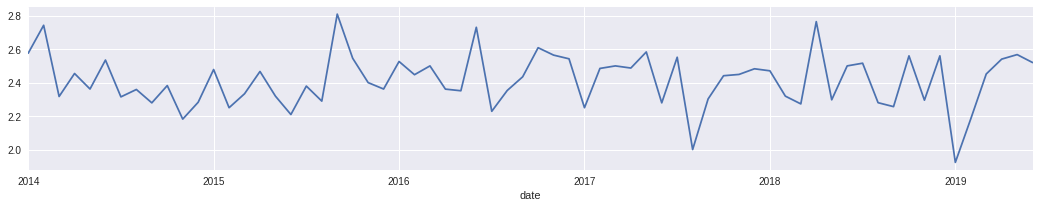

In [41]:
df = df.set_index(date)
last_round_data = df.resample('1M')['last_round'].mean()
last_round_data = last_round_data.fillna(0)
filtered_last_round_data = last_round_data['2014-01-01':]
filtered_last_round_data.plot(figsize=(18, 3));

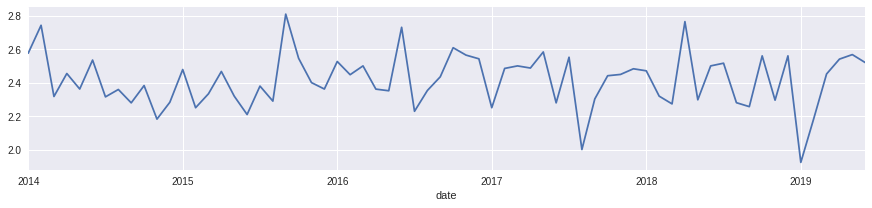

In [42]:
(
    df.set_index(date)
    .resample('1M')
    ['last_round'].mean()
    .fillna(0)
    .loc['2014-01-01':]
    .plot(figsize=(15, 3))
);

In [43]:
#slicer = pd.IndexSliсe
(
    df.assign(cities = lambda x: x['location'].str.split(',').str[0])
      .groupby([pd.Grouper(level=0, freq='1m'), 'cities'])
      ['last_round']
      .mean()
      .to_frame()
      #.loc[slicer['2014-01-01':, :], :]
      .head()
) 

last_round
date       cities               
1993-11-30 Denver       1.000000
1994-03-31 Denver       1.000000
1994-09-30 Charlotte    1.000000
1994-12-31 Tulsa        1.000000
1995-04-30 Charlotte    1.111111

### Pipelines

In [44]:
# Мы бы хотели делать так
# (
#   df.clean_dataset()
#     .filter_data()
#     .add_super_feauters()
#     .make_cofee()
# )

In [45]:
# Но делаем максимум так
# clean_df = clean_dataset(df)
# filtered_df = filter_data(clean_df)
# super_df = add_super_feauters(filtered_df)
# cofee = make_cofee(super_df)

Минусы:  
    -  Больший расход памяти и времени
    -  Искусственные переменные
Плюсы:
    -  Контролируемость процесса обработки данных
    -  Дебаггинг

In [46]:
def make_smth_stange(df):
    """
    DO SOMETHING
    """
    return df

In [47]:
result = df.pipe(make_smth_stange)
result.equals(df)  

True

In [48]:
def filter_dataset(df):
    return df.loc[:'2014'].query('B_fighter == "Marlon Moraes"')

In [49]:
df.pipe(filter_dataset)

R_fighter      B_fighter  R_KD  B_KD R_SIG_STR. B_SIG_STR.  \
date                                                                            
2019-06-08      Henry Cejudo  Marlon Moraes     0     0  90 of 171  57 of 119   
2019-02-02  Raphael Assuncao  Marlon Moraes     0     1    2 of 12   10 of 23   
2018-06-01     Jimmie Rivera  Marlon Moraes     0     1     0 of 3     7 of 9   
2017-11-11       John Dodson  Marlon Moraes     1     0  43 of 105  45 of 131   
2017-06-03  Raphael Assuncao  Marlon Moraes     0     0  43 of 134  44 of 150   

           R_SIG_STR_pct B_SIG_STR_pct R_TOTAL_STR. B_TOTAL_STR.  ...  \
date                                                              ...   
2019-06-08           52%           47%    99 of 182    59 of 121  ...   
2019-02-02           16%           43%      3 of 13     12 of 25  ...   
2018-06-01            0%           77%       0 of 3       7 of 9  ...   
2017-11-11           40%           34%    47 of 109    45 of 131  ...   
2017-06-03           32%           29%    43 of 134    44 of 150  ...   

           B_GROUND            win_by last_round last_round_time  \
date                                                               
2019-06-08   1 of 1            KO/TKO          3            4:51   
2019-02-02   3 of 5        Submission          1            3:17   
2018-06-01   5 of 6            KO/TKO          1            0:33   
2017-11-11   0 of 0  Decision - Split          3            5:00   
2017-06-03   0 of 0  Decision - Split          3            5:00   

                       Format          Referee               date  \
date                                                                
2019-06-08  5 Rnd (5-5-5-5-5)     Marc Goddard      June 08, 2019   
2019-02-02  5 Rnd (5-5-5-5-5)     Jason Herzog  February 02, 2019   
2018-06-01  5 Rnd (5-5-5-5-5)  Dan Miragliotta      June 01, 2018   
2017-11-11      3 Rnd (5-5-5)  Bill Bookwalter  November 11, 2017   
2017-06-03      3 Rnd (5-5-5)      Osiris Maia      June 03, 2017   

                                          location  \
date                                                 
2019-06-08                  Chicago, Illinois, USA   
2019-02-02                Fortaleza, Ceara, Brazil   
2018-06-01                    Utica, New York, USA   
2017-11-11                  Norfolk, Virginia, USA   
2017-06-03  Rio de Janeiro, Rio de Janeiro, Brazil   

                             Fight_type            Winner  
date                                                       
2019-06-08  UFC Bantamweight Title Bout      Henry Cejudo  
2019-02-02            Bantamweight Bout     Marlon Moraes  
2018-06-01            Bantamweight Bout     Marlon Moraes  
2017-11-11            Bantamweight Bout     Marlon Moraes  
2017-06-03            Bantamweight Bout  Raphael Assuncao  

[5 rows x 41 columns]

# Resources

Книга по Pandas и не только:  <br>
https://jakevdp.github.io/PythonDataScienceHandbook/  <br>
<br>
Серия статей по продвинотому pandas:  <br>
https://tomaugspurger.github.io/modern-1-intro<br>
<br>
Список туториалов от самого pandas:  <br>
https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html<br>


Презентацию можно будет достать по ссылке:   
https://github.com/carnotaur/pandas_tutorial